<a href="https://colab.research.google.com/github/ZborAl10/Neural-Networks/blob/main/FirstNeuro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [21]:
import torch

# **Тренировочный датасет**

Text(0.5, 1.0, 'y = sin(x)')

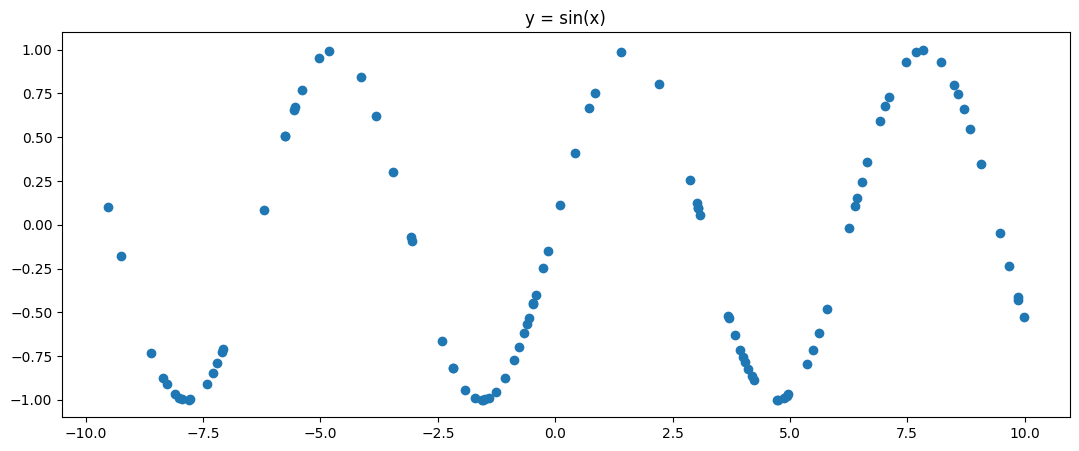

In [22]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('y = sin(x)')

Text(0.5, 1.0, 'Gaussian noise')

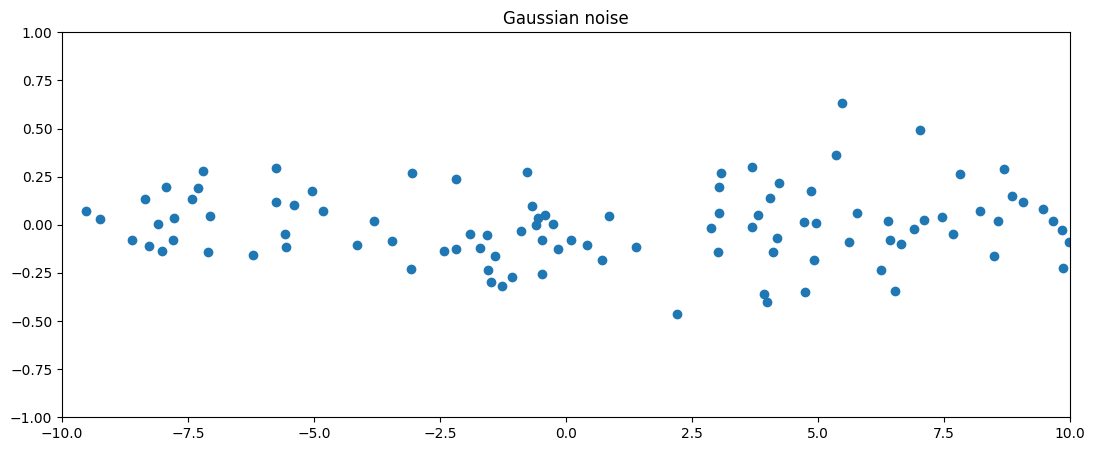

In [23]:
noise = torch.randn(y_train.shape) / 5

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise')

Text(0, 0.5, 'y_train')

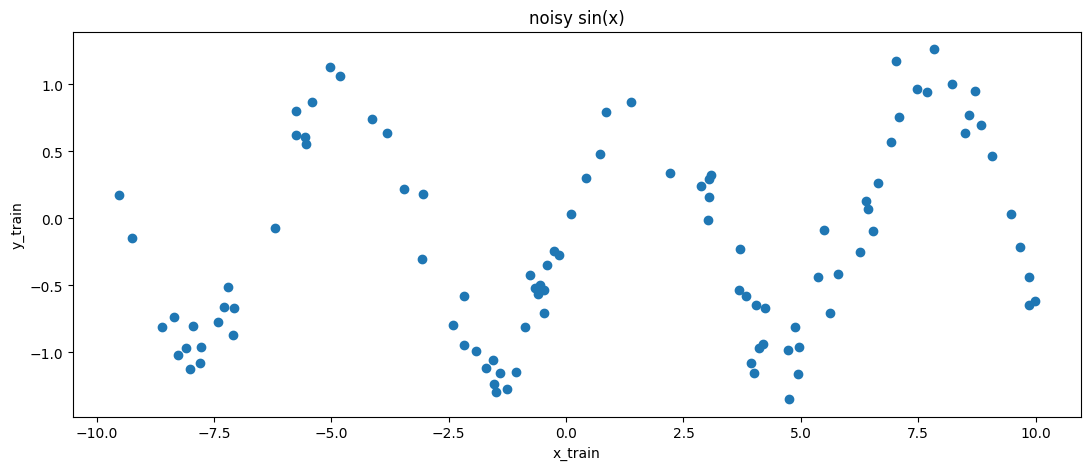

In [24]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train')

In [25]:
 # превращает векторы-строки в столбцы данных
 x_train.unsqueeze_(1)
 y_train.unsqueeze_(1)

tensor([[-0.2450],
        [-0.9616],
        [-1.1130],
        [-0.7068],
        [ 0.8717],
        [ 0.5531],
        [ 0.9515],
        [ 1.1742],
        [ 0.2392],
        [ 0.6385],
        [-0.4207],
        [-0.8118],
        [-0.0154],
        [-0.5786],
        [-0.5198],
        [-1.0797],
        [ 0.9395],
        [ 0.6937],
        [-0.8079],
        [-0.0835],
        [-0.2993],
        [-1.0771],
        [ 0.6387],
        [ 0.2612],
        [-0.3479],
        [-0.7752],
        [ 0.2172],
        [-0.5666],
        [ 0.3241],
        [-0.6488],
        [-0.2762],
        [-0.7978],
        [ 0.0341],
        [-0.8688],
        [ 1.1279],
        [-0.5796],
        [ 0.7380],
        [-0.9656],
        [-0.6495],
        [-1.2344],
        [-0.0728],
        [-0.2530],
        [-0.9461],
        [ 0.7709],
        [-1.2694],
        [ 0.4826],
        [ 0.6219],
        [ 1.2631],
        [-0.1466],
        [ 0.0317],
        [-0.4181],
        [-0.7384],
        [ 0.

# **Валидационный датасет**

Text(0, 0.5, 'y_validation')

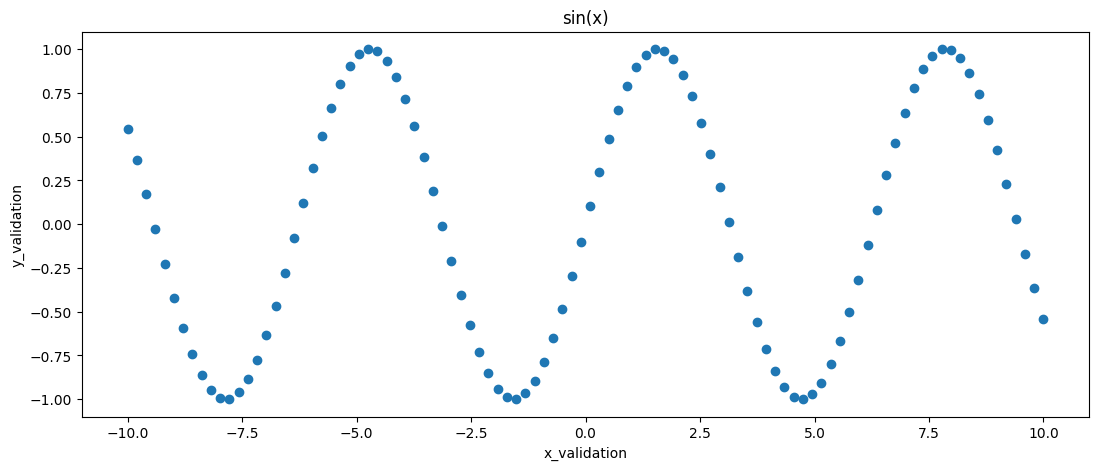

In [26]:
x_valid = torch.linspace(-10, 10, 100)
y_valid = torch.sin(x_valid.data)
plt.plot(x_valid.numpy(), y_valid.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

In [27]:
x_valid.unsqueeze_(1)
y_valid.unsqueeze_(1)

tensor([[ 0.5440],
        [ 0.3646],
        [ 0.1703],
        [-0.0308],
        [-0.2308],
        [-0.4213],
        [-0.5947],
        [-0.7439],
        [-0.8629],
        [-0.9467],
        [-0.9921],
        [-0.9971],
        [-0.9615],
        [-0.8869],
        [-0.7761],
        [-0.6338],
        [-0.4658],
        [-0.2787],
        [-0.0804],
        [ 0.1213],
        [ 0.3180],
        [ 0.5017],
        [ 0.6651],
        [ 0.8014],
        [ 0.9051],
        [ 0.9720],
        [ 0.9994],
        [ 0.9861],
        [ 0.9327],
        [ 0.8414],
        [ 0.7158],
        [ 0.5612],
        [ 0.3837],
        [ 0.1906],
        [-0.0103],
        [-0.2107],
        [-0.4026],
        [-0.5781],
        [-0.7300],
        [-0.8523],
        [-0.9399],
        [-0.9893],
        [-0.9985],
        [-0.9670],
        [-0.8962],
        [-0.7889],
        [-0.6496],
        [-0.4839],
        [-0.2984],
        [-0.1008],
        [ 0.1008],
        [ 0.2984],
        [ 0.

# **Построение модели**

In [28]:
class SinNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SinNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons) #fully connected - полносвязный слой
    self.act1 = torch.nn.Sigmoid() # 1я функция активации
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

sin_net = SinNet(50)

# **Предсказание**

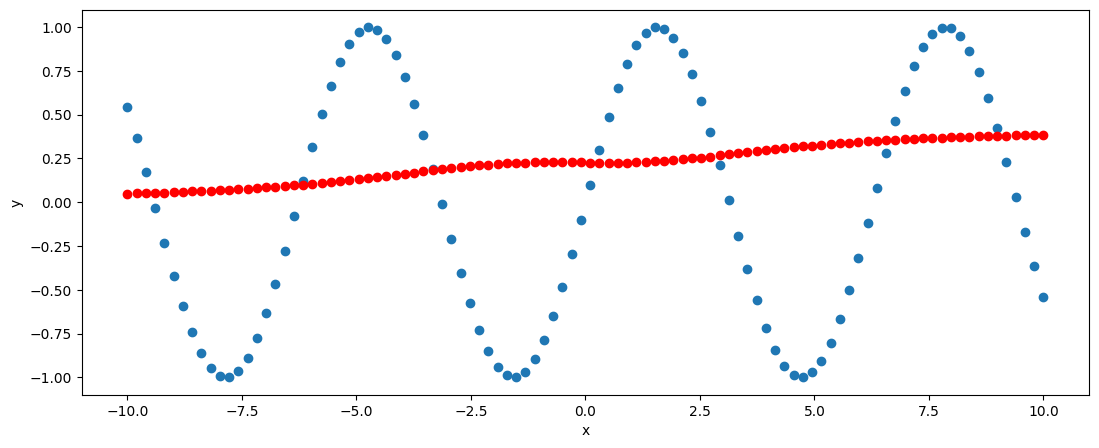

In [29]:
def predict(net, x, y):
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
  plt.xlabel('x')
  plt.ylabel('y')

predict(sin_net, x_valid, y_valid)

# **Оптимизация**

In [30]:
optimizer = torch.optim.Adam(sin_net.parameters(), lr=0.01)

# **Loss-функция**

In [31]:
def loss(pred, target): # здесь возьмем средний квадрат ошибки
  squares = (pred - target) ** 2
  return squares.mean()

# **Процедура тренировки**

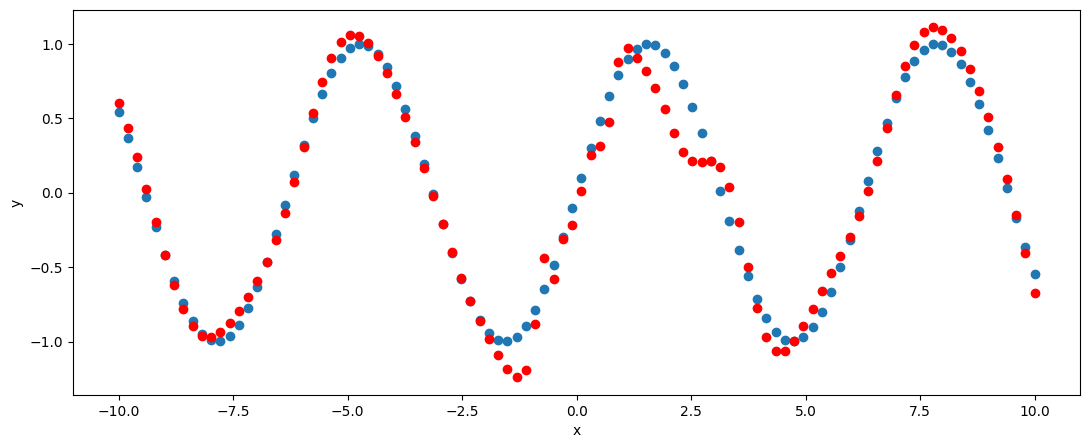

In [35]:
for epoch_index in range(2000): # протестируем на 5000 эпохах
  optimizer.zero_grad() # обнуляем градиент

  y_pred = sin_net.forward(x_train)
  loss_val = loss(y_pred, y_train)

  loss_val.backward()

  optimizer.step()

predict(sin_net, x_valid, y_valid)